# Finale Aufgabe für Praktikum Deep Learning <br>Textgenerierung mit RNN: Modelltraining

* **Name:** Fabian Schotte
* **Email:** fabian.schotte@rwu.de
* **Matrikelnummer:** 35604
* **Studiengang:** Angewandte Informatik

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pylab as plt
from work import models
import time 

os.makedirs("models", exist_ok=True)

2025-06-09 16:36:19.219240: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-09 16:36:19.226452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749486979.234850   32273 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749486979.237338   32273 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-09 16:36:19.246088: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Vorbereitung


### Laden der Trainingsdaten

In [2]:
df_train = pd.read_csv('work/kaggle_sentiment/tweet_sentiment_train.csv', encoding='utf-8', encoding_errors='replace')
df_test = pd.read_csv('work/kaggle_sentiment/tweet_sentiment_test.csv', encoding='utf-8', encoding_errors='replace')

kaggle_text_train = df_train['text'].str.cat(sep='\n')
kaggle_text_test = df_test['text'].str.cat(sep='\n')
# kaggle_text = kaggle_text_train + '\n' + kaggle_text_test
kaggle_text = kaggle_text_train
# kaggle_text = kaggle_text_test

print(kaggle_text[:500])

 I`d have responded, if I were going
 Sooo SAD I will miss you here in San Diego!!!
my boss is bullying me...
 what interview! leave me alone
 Sons of ****, why couldn`t they put them on the releases we already bought
http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth
2am feedings for the baby are fun when he is all smiles and coos
Soooo high
 Both of you
 Journey!? Wow... u just became cooler.  hehe... (is that possible!?)
 as much as i love to be hopef


In [3]:
vocab = sorted(set(kaggle_text))
print(vocab)
print(f"vocab size = {len(vocab)}")

['\t', '\n', ' ', '!', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\xa0', '´', '½', '¿', 'Â', 'ï']
vocab size = 102


## Preprocessing

In [4]:
# example_texts = ['hello world', 'hello world']
# chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
# chars

In [5]:
ids_from_chars = keras.layers.StringLookup(vocabulary=list(vocab), mask_token=None)
# ids = ids_from_chars(chars)
# print(ids)

chars_from_ids = keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)
# chars = chars_from_ids(ids)
# print(chars)

# tf.strings.reduce_join(chars, axis=-1).numpy()

I0000 00:00:1749486980.624008   32273 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9498 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:01:00.0, compute capability: 8.9


In [6]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

In [7]:
all_ids = ids_from_chars(tf.strings.unicode_split(kaggle_text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(1905188,), dtype=int64, numpy=array([ 3, 43, 66, ..., 85, 11, 11])>

In [8]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

 
I
`
d
 
h
a
v
e
 


2025-06-09 16:36:21.002007: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:
seq_length = 100

In [10]:
sequences = ids_dataset.batch(seq_length + 1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq).numpy())
for seq in sequences.take(1):
  print(text_from_ids(seq).numpy())

[b' ' b'I' b'`' b'd' b' ' b'h' b'a' b'v' b'e' b' ' b'r' b'e' b's' b'p'
 b'o' b'n' b'd' b'e' b'd' b',' b' ' b'i' b'f' b' ' b'I' b' ' b'w' b'e'
 b'r' b'e' b' ' b'g' b'o' b'i' b'n' b'g' b'\n' b' ' b'S' b'o' b'o' b'o'
 b' ' b'S' b'A' b'D' b' ' b'I' b' ' b'w' b'i' b'l' b'l' b' ' b'm' b'i'
 b's' b's' b' ' b'y' b'o' b'u' b' ' b'h' b'e' b'r' b'e' b' ' b'i' b'n'
 b' ' b'S' b'a' b'n' b' ' b'D' b'i' b'e' b'g' b'o' b'!' b'!' b'!' b'\n'
 b'm' b'y' b' ' b'b' b'o' b's' b's' b' ' b'i' b's' b' ' b'b' b'u' b'l'
 b'l' b'y' b'i']
b' I`d have responded, if I were going\n Sooo SAD I will miss you here in San Diego!!!\nmy boss is bullyi'


2025-06-09 16:36:21.062692: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [12]:
# split_input_target(list("Tensorflow"))

In [13]:
dataset = sequences.map(split_input_target)
len(dataset)

18863

In [14]:
for input_example, target_example in dataset.take(1):
    print("Input:", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())
    print("Input shape:", input_example.shape)
    print("Target shape:", target_example.shape)

Input: b' I`d have responded, if I were going\n Sooo SAD I will miss you here in San Diego!!!\nmy boss is bully'
Target: b'I`d have responded, if I were going\n Sooo SAD I will miss you here in San Diego!!!\nmy boss is bullyi'
Input shape: (100,)
Target shape: (100,)


2025-06-09 16:36:21.156947: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [15]:
BATCH_SIZE = 150
BUFFER_SIZE = 1000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(150, 100), dtype=tf.int64, name=None), TensorSpec(shape=(150, 100), dtype=tf.int64, name=None))>

In [16]:
vocab_size = len(ids_from_chars.get_vocabulary())
embedding_dim = 256
rnn_units = 2048

### 1. GRU-Modell

In [ ]:
vocab_size_1 = len(ids_from_chars.get_vocabulary())
embedding_dim_1 = 256
rnn_units_1 = 2048

gru_model_1 = models.get_gru_model_1(vocab_size_1, embedding_dim_1, rnn_units_1)

#### Testen des Modells

In [18]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions_model_1 = gru_model_1(input_example_batch)
    print(example_batch_predictions_model_1.shape, "# (batch_size, sequence_length, vocab_size)")

(150, 100, 103) # (batch_size, sequence_length, vocab_size)


I0000 00:00:1749486986.067306   32409 cuda_dnn.cc:529] Loaded cuDNN version 90501


In [19]:
gru_model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_tokens (InputLayer)       │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, None, 256)      │        26,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ [(None, None, 2048),   │    14,168,064 │
│                                 │ (None, 2048)]          │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ [(None, None, 2048),   │    25,178,112 │
│                                 │ (None, 2048)]          │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, None, 103)      │       211,047 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,583,591 (151.00 MB)

 Trainable params: 39,583,591 (151.00 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
sampled_indices_model_1 = tf.random.categorical(example_batch_predictions_model_1[0], num_samples=1)
sampled_indices_model_1 = tf.squeeze(sampled_indices_model_1, axis=-1).numpy()
sampled_indices_model_1

array([ 98,  34,  40,  84,  82,  66,  62,  72,  60,   4,  52,  43,  90,
        59,  49, 100,   7,  68,  27,  39,   7,  61,  24,  13,  13,  58,
        57,  75,  44,  21,  71,  61,  90,  48,  89,  29,  53,  29,  62,
        24,   9,  68,  31,  64,  51,  41,  95,  38,  92,  56,  96,  80,
        54,   4,  60,  98,   3,  49,  91,  60,  25,  73,  41,  17,  47,
        64,  71,  95,   8,  65,  73,   5,  96,  85,  19,  37,  54,  96,
        92,  35,  54,  57,  64,  88,  60,  96,   9,  57,  82,  25,  55,
        97,  87,  14,  69,  27,  70,   2,  64,  16])

In [21]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices_model_1).numpy())

Input:
 b' had a family emergency so there was a lil delay. Just can`t wait to see them\nsitting at home doing '

Next Char Predictions:
 b"\xc2\xb4@Frp`\\fZ!RIxYO\xc2\xbf%b9E%[6++XWiJ3e[xNw;S;\\6'b=^QG}DzV~nT!Z\xc2\xb4 OyZ7gG/M^e}&_g#~s1CT~zATW^vZ~'Wp7U\xc2\xa0u,c9d\n^."


### Training

#### Loss

In [22]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [23]:
example_batch_mean_loss_model_1 = loss(target_example_batch, example_batch_predictions_model_1)
print("Prediction shape: ", example_batch_predictions_model_1.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss_model_1)

Prediction shape:  (150, 100, 103)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.6352563, shape=(), dtype=float32)


/opt/conda/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [24]:
tf.exp(example_batch_mean_loss_model_1).numpy()

np.float32(103.05433)

#### Optimizer

In [25]:
gru_model_1.compile(optimizer='adam', loss=loss, metrics=['accuracy'], run_eagerly=True)

#### Early Stopping

In [26]:
early_stopping_gru_model_1 = keras.callbacks.EarlyStopping(monitor="loss", min_delta=0.002, patience=2)

#### Konfiguration von Checkpoints

In [27]:
checkpoint_dir = './work/training_checkpoints/gru_model_1'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")

checkpoint_callback_gru_model_1=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

#### Ausführen des Trainings

In [28]:
EPOCHS = 30

In [29]:
start = time.perf_counter()
gru_model_1_history = gru_model_1.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback_gru_model_1, early_stopping_gru_model_1])
end = time.perf_counter()
gru_model_1_training_time = end - start

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 250ms/step - accuracy: 0.1942 - loss: 3.4434
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 255ms/step - accuracy: 0.4069 - loss: 2.1446
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 249ms/step - accuracy: 0.4971 - loss: 1.7877
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 249ms/step - accuracy: 0.5344 - loss: 1.6355
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 250ms/step - accuracy: 0.5572 - loss: 1.5425
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 250ms/step - accuracy: 0.5754 - loss: 1.4659
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 247ms/step - accuracy: 0.5930 - loss: 1.3935
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 250ms/step - accuracy: 0.6129 - loss: 1.3148
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 250ms/step - accuracy: 0.6360 - loss: 1.2284
Epoch 10/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 247ms/step - accuracy: 0.6630 - loss: 1.1309
Epoch 11/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 248ms/step - accuracy: 0.6949 - loss: 1.0206
Epoch 12/30
125/125

#### Speichern

In [30]:
gru_model_1.save('work/models/gru_model_1.keras')

### 2. GRU-Modell

In [31]:
vocab_size_2 = len(ids_from_chars.get_vocabulary())
embedding_dim_2 = 256
rnn_units_2 = 1024


gru_model_2 = models.get_gru_model_2(vocab_size_2, embedding_dim_2, rnn_units_2)

#### Testen des Modells

In [32]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions_gru_model_2 = gru_model_2(input_example_batch)
    print(example_batch_predictions_gru_model_2.shape, "# (batch_size, sequence_length, vocab_size)")

(150, 100, 103) # (batch_size, sequence_length, vocab_size)


In [33]:
gru_model_2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_tokens (InputLayer)       │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, None, 256)      │        26,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ [(None, None, 1024),   │     3,938,304 │
│                                 │ (None, 1024)]          │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, None, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ [(None, None, 1024),   │     6,297,600 │
│                                 │ (None, 1024)]          │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, None, 103)      │       105,575 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,367,847 (39.55 MB)

 Trainable params: 10,367,847 (39.55 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
sampled_indices_gru_model_2 = tf.random.categorical(example_batch_predictions_gru_model_2[0], num_samples=1)
sampled_indices_gru_model_2 = tf.squeeze(sampled_indices_gru_model_2, axis=-1).numpy()
sampled_indices_gru_model_2

array([ 27,  25,  51,  70,  90,  86,  87,  11,  49,  41,  97,   8,  36,
        89,  46,  15,  95,   6,   7,  63,   0,  96,  45,  89,  87,  44,
       100,  39,  56,  35,  98,   9,  10,  37,   4,  67,  99,  59,  76,
         5,   8,  60,  63,  69,  43,  71,  44,  85, 102,  89,  96,  48,
        81,  11,  61,   3,  19,  59,  65,  25,  17,  80,  35,  81,  85,
        71,  17,   3,  44,  88,   3,  55,  41,  77,  30,   1,  77,  72,
         7,  52,  15,  22,   5,   5,  31,  98,  85,  39,  47,   9,  40,
        61,  83,  11, 100,  53,  79,  74,  47,  43])

In [35]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices_gru_model_2).numpy())

Input:
 b'for being unhappy for about 10 minutes.\n That`s very funny.  Cute kids.\n Ahhh, I slept through the g'

Next Char Predictions:
 b"97Qdxtu)OG\xc2\xa0&BwL-}$%][UNK]~KwuJ\xc2\xbfEVA\xc2\xb4'(C!a\xc2\xbdYj#&Z]cIeJs\xc3\xafw~No)[ 1Y_7/nAose/ Jv UGk<\tkf%R-4##=\xc2\xb4sEM'F[q)\xc2\xbfSmhMI"


### Training

#### Loss

In [36]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [37]:
example_batch_mean_loss_model_2 = loss(target_example_batch, example_batch_predictions_gru_model_2)
print("Prediction shape: ", example_batch_predictions_gru_model_2.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss_model_2)

Prediction shape:  (150, 100, 103)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.634796, shape=(), dtype=float32)


In [38]:
tf.exp(example_batch_mean_loss_model_1).numpy()

np.float32(103.05433)

#### Optimizer

In [39]:
gru_model_2.compile(optimizer='adam', loss=loss, metrics=['accuracy'], run_eagerly=True)

#### Early Stopping

In [40]:
early_stopping_model_2 = keras.callbacks.EarlyStopping(monitor="loss", min_delta=0.002, patience=2)

#### Konfiguration von Checkpoints

In [41]:
checkpoint_dir = './work/training_checkpoints/gru_model_2'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")

checkpoint_callback_gru_model_2=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

#### Ausführen des Trainings

In [42]:
EPOCHS = 30

In [43]:
start = time.perf_counter()
gru_model_2_history = gru_model_2.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback_gru_model_2, early_stopping_model_2])
end = time.perf_counter()
gru_model_2_training_time = end - start

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - accuracy: 0.1891 - loss: 3.4546
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.3907 - loss: 2.2028
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.4789 - loss: 1.8571
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.5166 - loss: 1.7046
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.5379 - loss: 1.6194
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.5521 - loss: 1.5622
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.5635 - loss: 1.5150
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.5735 - loss: 1.4734
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.5820 - loss: 1.4369
Epoch 10/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 112ms/step - accuracy: 0.5910 - loss: 1.3991
Epoch 11/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.5997 - loss: 1.3635
Epoch 12/30
125/125

### Speichern

In [44]:
gru_model_2.save('work/models/gru_model_2.keras')

## Bewertung und Vergleich der GRU-Modelle

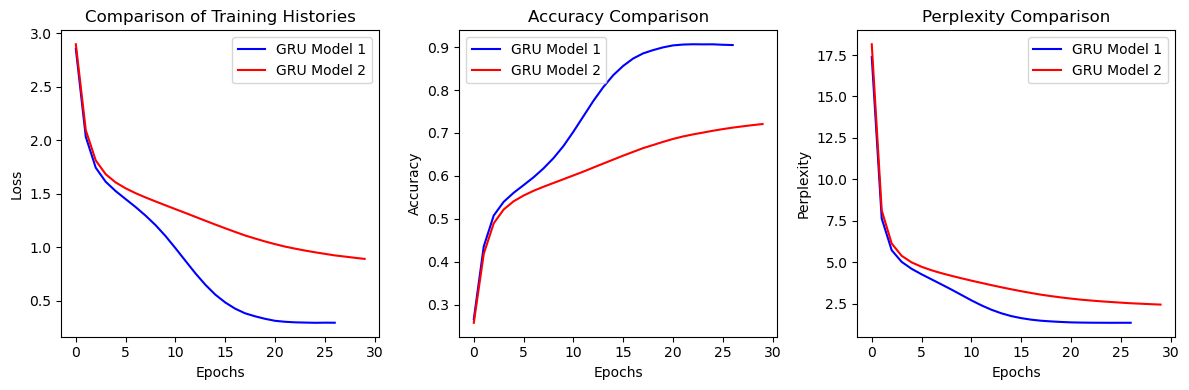

Training Times:
 GRU Model 1: 842.2258693999993s
 GRU Model 2: 432.22543826699984s


In [ ]:
loss1 = gru_model_1_history.history['loss']
loss2 = gru_model_2_history.history['loss']

accuracy1 = gru_model_1_history.history['accuracy']
accuracy2 = gru_model_2_history.history['accuracy']

perplexity1 = np.exp(loss1)
perplexity2 = np.exp(loss2)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4)) 

axes[0].plot(loss1, label="GRU Model 1", linestyle='-', color='blue')
axes[0].plot(loss2, label="GRU Model 2", linestyle='-', color='red')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].set_title("Comparison of Training Histories")
axes[0].legend()

axes[1].plot(accuracy1, label="GRU Model 1", linestyle='-', color='blue')
axes[1].plot(accuracy2, label="GRU Model 2", linestyle='-', color='red')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Accuracy Comparison")
axes[1].legend()

axes[2].plot(perplexity1, label="GRU Model 1", linestyle='-', color='blue')
axes[2].plot(perplexity2, label="GRU Model 2", linestyle='-', color='red')
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Perplexity")
axes[2].set_title("Perplexity Comparison")
axes[2].legend()

plt.tight_layout()

plt.show()
print("Training Times:")
print(f" GRU Model 1: {gru_model_1_training_time}s")
print(f" GRU Model 2: {gru_model_2_training_time}s")


### LSTM-Modell

In [58]:
import work.models

lstm_model = work.models.get_lstm_model_1(vocab_size_1, embedding_dim_1, rnn_units_1)

#### Testen des Modells

In [59]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions_lstm_model = lstm_model(input_example_batch)
    print(example_batch_predictions_lstm_model.shape, "# (batch_size, sequence_length, vocab_size)")

(150, 100, 103) # (batch_size, sequence_length, vocab_size)


2025-06-09 16:59:38.084667: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [60]:
lstm_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_tokens (InputLayer)       │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ (None, None, 256)      │        26,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ [(None, None, 2048),   │    18,882,560 │
│                                 │ (None, 2048), (None,   │               │
│                                 │ 2048)]                 │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ [(None, None, 2048),   │    33,562,624 │
│                                 │ (None, 2048), (None,   │               │
│                                 │ 2048)]                 │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, None, 103)      │       211,047 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,682,599 (200.97 MB)

 Trainable params: 52,682,599 (200.97 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
sampled_indices_lstm_model = tf.random.categorical(example_batch_predictions_lstm_model[0], num_samples=1)
sampled_indices_lstm_model = tf.squeeze(sampled_indices_lstm_model, axis=-1).numpy()
sampled_indices_lstm_model

array([ 68,  42,   5,  57,  18,  17,  59, 101,  77,  83,   9,  79,  62,
       101,  74,  96,  71,  99,  23,  28,  26,  16,  59,   0,  26,  64,
         6,  85,  43,  36,  85,  16,  88, 101,  35,  77,   4,  75,  88,
        25,  43,  47,  76,  89,  32,  16,  25,   5,  34,  96,   1,  70,
        56,   1,  88,  87,  54,   8,  94,  28,  78,  69,  72,  59,  35,
        44,  79,  89,  96,  59,   5,   0,  31,  66,  69,  68,  84,  67,
        12,  86,   1,  21,  55,  43,  66,  31,  52,   9,  49,  85,  38,
        14,  27,  97,  66,  98,  59,   2, 100,  24])

In [62]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices_gru_model_2).numpy())

Input:
 b'\nam chillaxin after a busy BankHoliday, Hope everbody had a gd wkend! Holiday in 12 days!!!  ****\nHa'

Next Char Predictions:
 b"97Qdxtu)OG\xc2\xa0&BwL-}$%][UNK]~KwuJ\xc2\xbfEVA\xc2\xb4'(C!a\xc2\xbdYj#&Z]cIeJs\xc3\xafw~No)[ 1Y_7/nAose/ Jv UGk<\tkf%R-4##=\xc2\xb4sEM'F[q)\xc2\xbfSmhMI"


### Training

#### Loss

In [63]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [64]:
example_batch_mean_loss_lstm_model = loss(target_example_batch, example_batch_predictions_lstm_model)
print("Prediction shape: ", example_batch_predictions_lstm_model.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss_lstm_model)

Prediction shape:  (150, 100, 103)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.634677, shape=(), dtype=float32)


/opt/conda/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [65]:
tf.exp(example_batch_mean_loss_lstm_model).numpy()

np.float32(102.99464)

#### Optimizer

In [66]:
lstm_model.compile(optimizer='adam', loss=loss, metrics=['accuracy'], run_eagerly=True)

#### Konfiguration von Checkpoints

In [67]:
checkpoint_dir = './work/training_checkpoints/lstm_model'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")

checkpoint_callback_gru_model_2=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

#### Ausführen des Trainings

In [68]:
EPOCHS = 30

In [69]:
start = time.perf_counter()
lstm_model_history = lstm_model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback_gru_model_2, early_stopping_model_2])
end = time.perf_counter()
lstm_model_training_time = end - start

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 289ms/step - accuracy: 0.1613 - loss: 3.7233
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 285ms/step - accuracy: 0.3199 - loss: 2.4817
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 289ms/step - accuracy: 0.4541 - loss: 1.9622
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 283ms/step - accuracy: 0.5089 - loss: 1.7383
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 281ms/step - accuracy: 0.5373 - loss: 1.6235
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 282ms/step - accuracy: 0.5566 - loss: 1.5450
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 281ms/step - accuracy: 0.5726 - loss: 1.4804
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 279ms/step - accuracy: 0.5881 - loss: 1.4174
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 281ms/step - accuracy: 0.6049 - loss: 1.3533
Epoch 10/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 280ms/step - accuracy: 0.6237 - loss: 1.2813
Epoch 11/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 287ms/step - accuracy: 0.6463 - loss: 1.2004
Epoch 12/30
125/125

#### Speichern

In [74]:
lstm_model.save('work/models/lstm_model.keras')

## Vergleich aller Modelle

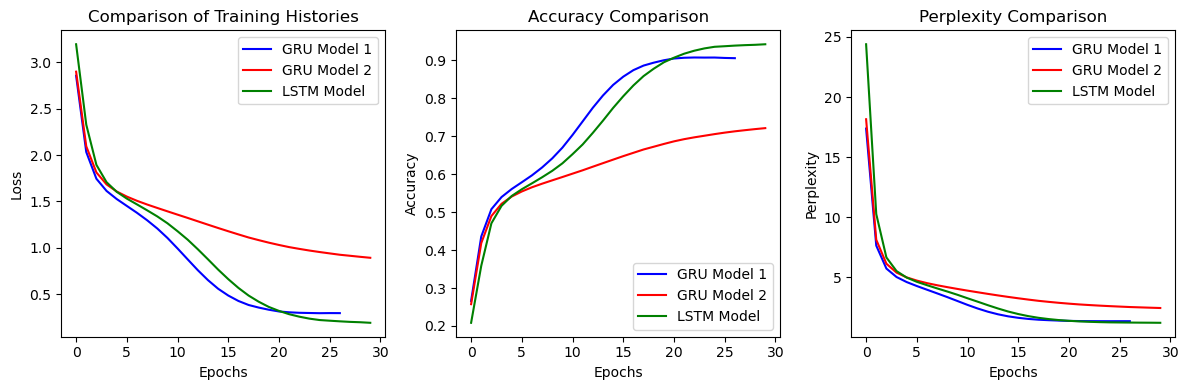

Training Times:
 GRU Model 1: 842.2258693999993s
 GRU Model 2: 432.22543826699984s
 LSTM Model: 1055.914561783s


In [71]:
loss1 = gru_model_1_history.history['loss']
loss2 = gru_model_2_history.history['loss']
loss3 = lstm_model_history.history['loss']

accuracy1 = gru_model_1_history.history['accuracy']
accuracy2 = gru_model_2_history.history['accuracy']
accuracy3 = lstm_model_history.history['accuracy']

perplexity1 = np.exp(loss1)
perplexity2 = np.exp(loss2)
perplexity3 = np.exp(loss3)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4)) 

axes[0].plot(loss1, label="GRU Model 1", linestyle='-', color='blue')
axes[0].plot(loss2, label="GRU Model 2", linestyle='-', color='red')
axes[0].plot(loss3, label="LSTM Model", linestyle='-', color='green')
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].set_title("Comparison of Training Histories")
axes[0].legend()

axes[1].plot(accuracy1, label="GRU Model 1", linestyle='-', color='blue')
axes[1].plot(accuracy2, label="GRU Model 2", linestyle='-', color='red')
axes[1].plot(accuracy3, label="LSTM Model", linestyle='-', color='green')
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Accuracy Comparison")
axes[1].legend()

axes[2].plot(perplexity1, label="GRU Model 1", linestyle='-', color='blue')
axes[2].plot(perplexity2, label="GRU Model 2", linestyle='-', color='red')
axes[2].plot(perplexity3, label="LSTM Model", linestyle='-', color='green')
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Perplexity")
axes[2].set_title("Perplexity Comparison")
axes[2].legend()

plt.tight_layout()

plt.show()
print("Training Times:")
print(f" GRU Model 1: {gru_model_1_training_time}s")
print(f" GRU Model 2: {gru_model_2_training_time}s")
print(f" LSTM Model: {lstm_model_training_time}s")
